In [23]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration
from rdkit.Chem import PandasTools
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
path_to_library = '../FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['AP', 'B2', 'SE', 'B1', 'FP', 'GA']

In [25]:
# read data

data = pd.DataFrame()

rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]

    file = folder+'/'+subpocket+'.sdf' 
    df = PandasTools.LoadSDF(file, includeFingerprints=True, embedProps=True)
    df['NumHeavyAtoms'] = df.apply(lambda x: x['ROMol'].GetNumHeavyAtoms(), axis=1)
        
    fragments = []
    fingerprints = []
    smiles =[]

    for frag in df.ROMol:
        # remove dummy atoms from fragments and create smiles
        du = Chem.MolFromSmiles('*')
        h = Chem.MolFromSmiles('[H]', sanitize=False)
        fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
        fixed_frag = Chem.RemoveHs(fixed_frag)
        fragments.append(fixed_frag)
        # fingerprint of fragment
        fingerprints.append(rdkit_gen.GetFingerprint(fixed_frag))
        # smiles for comparing fragments
        smiles.append(Chem.MolToSmiles(fixed_frag))
      
    df['smiles'] = smiles
    df['fragment'] = fragments
    df['fingerprint'] = fingerprints
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
data = data.reset_index(drop=True)
data.shape

RDKit ERROR: [16:36:30] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 65
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 129
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit E

RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 2073
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 2122
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 8036
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:45] Unexpected error hit on line 8096
RDKit ERROR: [17:27:45] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:45] 
RDKi

RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 14118
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 14182
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_

RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 20484
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 20555
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 23452
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 23524
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 30379
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 30451
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RD

RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 36923
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:46] Unexpected error hit on line 36978
RDKit ERROR: [17:27:46] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 44159
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 44219
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 49153
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 49214
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 55859
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 55925
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 64573
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpected error hit on line 64652
RDKit ERROR: [17:27:47] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:47] Unexpect

RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 70966
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 71042
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RD

RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 77184
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 77244
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 83723
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 83791
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_ar

RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 89985
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 90049
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 17

RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 96716
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:48] Unexpected error hit on line 96783
RDKit ERROR: [17:27:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 102259
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 102318
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 108399
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 108456
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 


RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 114905
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 24 < 24
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 115017
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 121824
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 121914
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 


RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 128097
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:49] Unexpected error hit on line 128163
RDKit ERROR: [17:27:49] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 134598
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 134661
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 140888
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 140954
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 147192
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 147266
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 153579
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 153644
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 


RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 160116
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:50] Unexpected error hit on line 160176
RDKit ERROR: [17:27:50] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:50] 


RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 166230
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 166303
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 


RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 23 < 23
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 172475
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 172566
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 


RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 177527
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 177610
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:27:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:51] Unexpected error hit on line 183345
RDKit ERROR: [17:27:51] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected error hit on line 47
RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERR

RDKit ERROR: [17:27:57] Unexpected error hit on line 3719
RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected error hit on line 3806
RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected error hit on line 3893
RDKit ERROR: [17:27:57] ERROR: moving to the b

RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected error hit on line 11757
RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected error hit on line 11812
RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:57] Unexpected

RDKit ERROR: [17:27:57] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 56
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 169
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERR

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 20 < 20
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 5753
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 5857
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurre

RDKit ERROR: [17:27:58] Unexpected error hit on line 13744
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 13809
RDKit ERROR: [17:27:58] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:58] Unexpected error hit on line 13864
RDKit ERROR: [17:27:58] ERROR: moving to the 

RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 20659
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 20752
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 27215
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 27280
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RD

RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 35078
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 35147
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 41780
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 15 < 15
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:27:59] Unexpected error hit on line 41870
RDKit ERROR: [17:27:59] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:27:59] 
RDKi

RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 48826
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 21 < 21
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 48946
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RD

RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 56989
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 57089
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 64164
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 64213
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred 

RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 72276
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 72344
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/co

RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 78833
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:00] Unexpected error hit on line 78897
RDKit ERROR: [17:28:00] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 86781
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 86843
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit 

RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 93913
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 93981
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 16 < 16
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 101618
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 101706
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
R

RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 109262
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:01] Unexpected error hit on line 109311
RDKit ERROR: [17:28:01] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: [17:28:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:04] Unexpected error hit on line 4732
RDKit ERROR: [17:28:04] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:04] Unexpected error hit on line 4787
RDKit ERROR: [17:28:04] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERR

RDKit ERROR: [17:28:04] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:04] Unexpected error hit on line 56
RDKit ERROR: [17:28:04] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:04] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:04] Unexpected error hit on line 119
RDKit ERROR: [17:28:04] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:04] 
RDKit ERR

RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 7648
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 22 < 22
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 7766
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKi

RDKit ERROR: Failed Expression: 19 < 19
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 14543
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 14620
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpe

RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 20761
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 20822
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 26770
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 26843
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 33336
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:05] Unexpected error hit on line 33413
RDKit ERROR: [17:28:05] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:05] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 26 < 26
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 41072
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 41133
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKi

RDKit ERROR: [17:28:06] Unexpected error hit on line 50392
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 50474
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 50520
RDKit ERROR: [17:28:06] ERROR: moving to the 

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 58131
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 58190
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occur

RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 66004
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 66059
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit 

RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 73144
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 73226
RDKit ERROR: [17:28:06] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:06] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:06] Unexpected error hit on line 73281
RDKit ERROR: 

RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 80121
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 80174
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit 

RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 17 < 17
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 86689
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 86780
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RD

RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 94767
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 94841
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RD

RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 102613
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:07] Unexpected error hit on line 102674
RDKit ERROR: [17:28:07] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:07] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:08] Unexpected error hit on line 110405
RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:08] Unexpected error hit on line 110462
RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:08] 
RD

RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:08] Unexpected error hit on line 118303
RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:08] Unexpected error hit on line 118364
RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:08] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 18 < 18
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:08] Unexpe

RDKit ERROR: [17:28:08] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 5 < 5
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:11] Unexpected error hit on line 45
RDKit ERROR: [17:28:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 7 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:11] Unexpected error hit on line 102
RDKit ERROR: [17:28:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:11] 
RDKit ERROR

RDKit ERROR: [17:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:11] Unexpected error hit on line 5968
RDKit ERROR: [17:28:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:11] Unexpected error hit on line 6031
RDKit ERROR: [17:28:11] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 13335
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 13384
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpect

RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 19637
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 10 < 10
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 19697
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKi

RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 25703
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 25762
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred 

RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 32587
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 32658
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit

RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 38864
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 9
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:12] Unexpected error hit on line 38929
RDKit ERROR: [17:28:12] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:12] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 46229
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 46298
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RD

RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 6 < 6
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 52902
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 8 < 8
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 52953
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit E

RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 59425
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 59509
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 11 < 11
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 59575
RDKit ERROR: [17:28:13] ERROR

RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 66723
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 66786
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDK

RDKit ERROR: Failed Expression: 12 < 12
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 73366
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 14 < 14
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpected error hit on line 73433
RDKit ERROR: [17:28:13] ERROR: moving to the begining of the next molecule
RDKit ERROR: [17:28:13] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 174 in file /home/conda/feedstock_root/build_artifacts/rdkit_1557999841242/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 13 < 13
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:28:13] Unexpe

(7426, 15)

In [26]:
n_frags_per_sp = {}
for sp in subpockets:
    n_frags_per_sp[sp] = data[data.subpocket == sp].shape[0]
n_frags_per_sp

{'AP': 2616, 'B2': 245, 'SE': 1488, 'B1': 117, 'FP': 1760, 'GA': 1200}

Similarity of fragments between the kinase groups:

In [27]:
groups = data.group.unique()

In [28]:
# matrix with mean similarites between groups 
sim_matrix1 = pd.DataFrame(0, index=groups, columns=groups)
# matrix with mean similarities between groups averaged over subpockets
sim_matrix = pd.DataFrame(0, index=groups, columns=groups)
# one similarity matrix for each subpocket
sim_matrices = {}
for sp in subpockets:
    sim_matrices[sp] = pd.DataFrame(0, index=groups, columns=groups)

# iterate over groups
for g1 in groups:
    for g2 in groups:
        
        dg1 = data[data.group==g1]
        dg2 = data[data.group==g2]
        
        sum_all_sims = 0
        count_all_sims = 0
        sum_mean_sims = 0
        count_sps = 0
        # iterate over subpockets
        for sp in subpockets:
            
            dg1sp = dg1[dg1.subpocket==sp]
            dg2sp = dg2[dg2.subpocket==sp]
            
            if dg1sp.empty or dg2sp.empty:
                sim_matrices[sp].loc[g1,g2] = None
                continue
            
            count_sims = 0
            sum_sims = 0
            # iterate over fragment pairs
            for i, fp1 in enumerate(dg1sp.fingerprint):
                for j, fp2 in enumerate(dg2sp.fingerprint):
                    
                    if g1 != g2 or i != j:
                        sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                        sum_sims += sim
                        sum_all_sims += sim
                        count_sims += 1
                        count_all_sims += 1
            
            # if nothing was compared
            if count_sims == 0:
                sim_matrices[sp].loc[g1,g2] = None
                continue
                        
            mean_sim = sum_sims/count_sims  
            sum_mean_sims += mean_sim
            count_sps += 1
            sim_matrices[sp].loc[g1,g2] = mean_sim
   
        sim_matrix1.loc[g1,g2] = sum_all_sims/count_all_sims
        
        sim_matrix.loc[g1, g2] = sum_mean_sims/count_sps

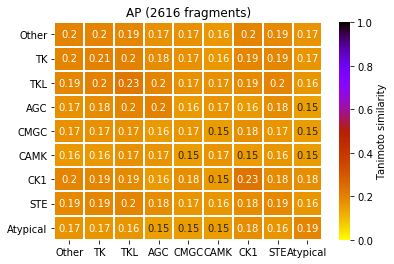

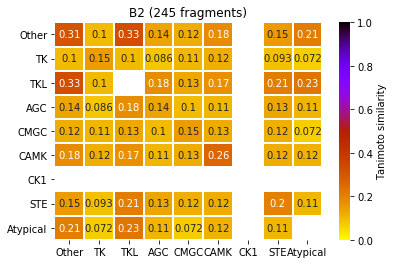

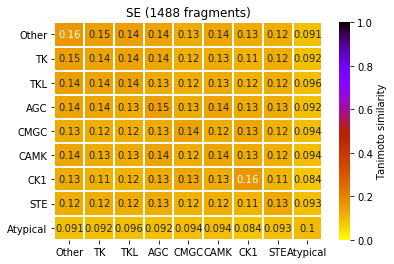

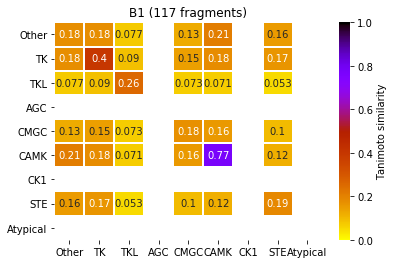

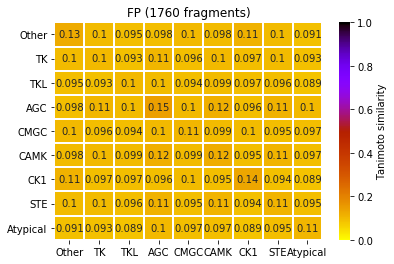

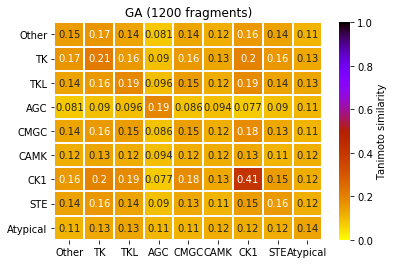

In [29]:
for sp in subpockets:
    sns.heatmap(sim_matrices[sp], linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="gnuplot_r",
               vmin=0, vmax=1)
    plt.title(sp+' ('+str(n_frags_per_sp[sp])+' fragments)')
    plt.show()

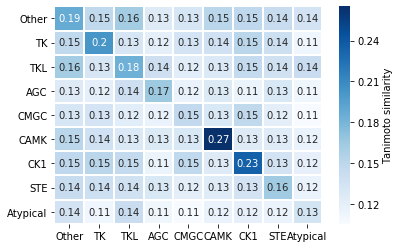

In [30]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

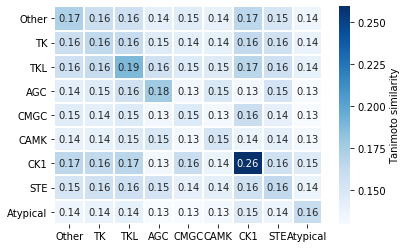

In [31]:
sns.heatmap(sim_matrix1, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

Similarity of fragments within kinase groups per subpocket:

In [62]:
sim_matrix = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])
sims1 = pd.Series(0, index=groups)

sim_data = {}

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    sum_all_sims = 0
    count_all_sims = 0
    sim_data_group = []
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dgsp.fingerprint):
            for j, fp2 in enumerate(dgsp.fingerprint):
                
                if i != j:

                    sim = DataStructs.FingerprintSimilarity(fp1, fp2) # tanimoto similarity
                    sum_sims += sim
                    sum_all_sims += sim
                    count_sims += 1
                    count_all_sims += 1
                    sim_data_group.append(sim)
                    
        if count_sims == 0:
            sim_matrix.loc[group, sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sim_matrix.loc[group, sp] = mean_sim
        
    mean_group = sum_all_sims/count_all_sims
    sims1.loc[group] = mean_group
    
    sim_data[group] = sim_data_group

In [71]:
sim_df = pd.DataFrame(columns=['Tanimoto similarity'])
for group in groups:
    df = pd.DataFrame(sim_data[group], columns=['Tanimoto similarity'])
    df['group'] = group
    sim_df = sim_df.append(df)

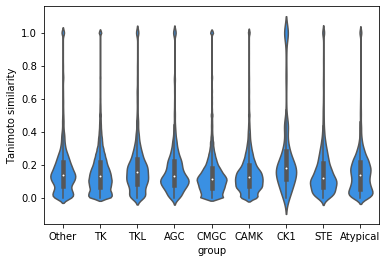

In [75]:
ax = sns.violinplot(x='group', y='Tanimoto similarity', data=sim_df, color='dodgerblue')

Similarity within subpockets:

In [33]:
sims = pd.Series(0, index=subpockets)
sim_data = {}
count_equal = {}

# total similarity per subpocket
for sp in subpockets:
    
        dsp = data[data.subpocket==sp]
        sim_data_sp = []
        count_equal[sp] = 0
        
        sum_sims = 0
        count_sims = 0
        # iterate over fragment pairs
        for i, fp1 in enumerate(dsp.fingerprint):
            for j, fp2 in enumerate(dsp.fingerprint):
                
                if i != j:

                    sim = DataStructs.FingerprintSimilarity(fp1, fp2)
                    if sim == 1:
                        count_equal[sp] += 1
                    sim_data_sp.append(sim)
                    sum_sims += sim # tanimoto similarity
                    count_sims += 1
                    
        if count_sims == 0:
            sims.loc[sp] = None
            continue
                    
        mean_sim = sum_sims/count_sims
        sims.loc[sp] = mean_sim
        
        sim_data[sp] = sim_data_sp

In [34]:
count_equal

{'AP': 23652, 'B2': 1072, 'SE': 16216, 'B1': 928, 'FP': 15152, 'GA': 12540}

In [35]:
count_equal['AP']/len(sim_data['AP'])

0.0034574701352465486

In [36]:
colors=['purple','forestgreen','c','tab:orange','tab:blue','darkslateblue']

In [37]:
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']

In [38]:
sim_df = pd.DataFrame(columns=['Tanimoto similarity'])
for sp in subpockets:
    df = pd.DataFrame(sim_data[sp], columns=['Tanimoto similarity'])
    df['subpocket'] = sp
    sim_df = sim_df.append(df)

/home/paulaju/miniconda3/envs/kffl/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [39]:
my_pal = {"AP": "purple", "FP": "forestgreen", "SE":"c", "GA":"tab:orange", "B1":"tab:blue", "B2":"darkslateblue"}

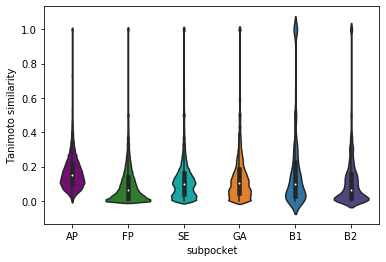

In [40]:
ax = sns.violinplot(x='subpocket', y='Tanimoto similarity', data=sim_df, palette=my_pal)

In [41]:
sims

AP    0.173780
B2    0.119949
SE    0.129028
B1    0.184159
FP    0.101098
GA    0.142992
dtype: float64

In [42]:
sims1

Other       0.171353
TK          0.164240
TKL         0.188142
AGC         0.177210
CMGC        0.146768
CAMK        0.152543
CK1         0.259140
STE         0.163756
Atypical    0.160897
dtype: float64

In [43]:
sim_matrix.loc['Total'] = sims
sim_matrix['Total'] = sims1

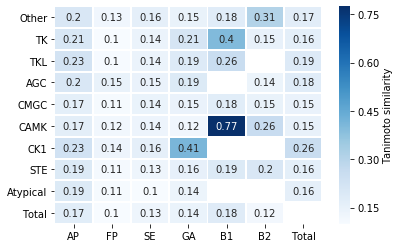

In [44]:
sns.heatmap(sim_matrix, linewidths=1, annot=True, cbar_kws={"label": "Tanimoto similarity"}, cmap="Blues")
plt.show()

In [45]:
n_frags = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        
        n = dgsp.shape[0]
        n_frags.loc[group, sp] = n

Number of fragments in kinase groups:

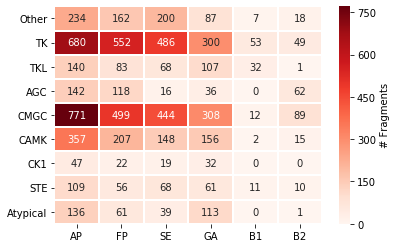

In [46]:
sns.heatmap(n_frags, linewidths=1, annot=True, cbar_kws={"label": "# Fragments"}, cmap="Reds", fmt='g')
plt.show()

In [47]:
# number of fragments per kinase group as bar plot
n_frags_per_group = n_frags.sum(axis=1)
n_frags_per_group

Other        708
TK          2120
TKL          431
AGC          374
CMGC        2123
CAMK         885
CK1          120
STE          315
Atypical     350
dtype: int64

In [48]:
n_unique = pd.Series(0, index=groups)

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n_unique.loc[group] += nu
        

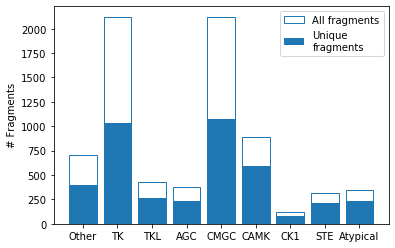

In [49]:
plt.figure()
plt.bar(groups, n_frags_per_group, fill=False, edgecolor='tab:blue')
plt.bar(groups, n_unique, color='tab:blue')
plt.legend(['All fragments', 'Unique\nfragments'])
plt.ylabel('# Fragments')
plt.show()

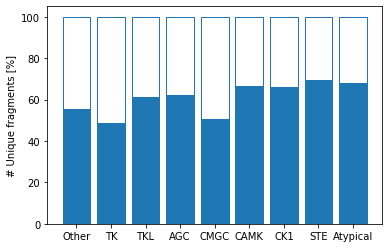

In [50]:
p_unique = np.asarray(n_unique)/np.asarray(n_frags_per_group)*100
plt.figure()
plt.bar(groups, [100 for x in groups], fill=False, edgecolor='tab:blue')
plt.bar(groups, p_unique, color='tab:blue')
plt.ylabel('# Unique fragments [%]')
plt.yticks(range(0,101,20))
plt.show()

Fragment distribution across subpockets in each kinase group:

In [51]:
# convert to relative numbers
n_frags.loc['Total'] = n_frags.sum()

In [52]:
total = n_frags.sum(axis=1)
for index, row in n_frags.iterrows():
    n_frags.loc[index] = row/total[index]

In [53]:
n_frags = n_frags*100

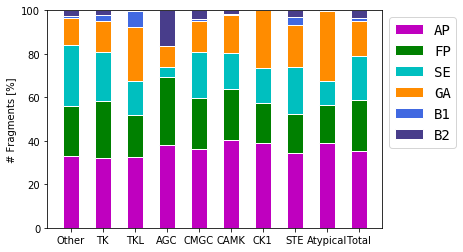

In [54]:
# n_frags as stacked bar plot
r = range(len(groups)+1)
df = n_frags
 
# plot
barWidth = 0.5

plt.figure()
plt.bar(r, df['AP'], edgecolor='white', width=barWidth, color='m', label='AP')
plt.bar(r, df['FP'], bottom=df['AP'], edgecolor='white', width=barWidth, color='g', label='FP')
plt.bar(r, df['SE'], bottom=[i+j for i,j in zip(df['AP'], df['FP'])], edgecolor='white', width=barWidth, color='c', label='SE')
plt.bar(r, df['GA'], bottom=[i+j+k for i,j,k in zip(df['AP'], df['FP'], df['SE'])], 
        edgecolor='white', width=barWidth, color='darkorange', label='GA')
plt.bar(r, df['B1'], bottom=[i+j+k+l for i,j,k,l in zip(df['AP'], df['FP'], df['SE'], df['GA'])], 
        edgecolor='white', width=barWidth, color='royalblue', label='B1')
plt.bar(r, df['B2'], bottom=[i+j+k+l+m for i,j,k,l,m in zip(df['AP'], df['FP'], df['SE'], df['GA'], df['B1'])], 
        edgecolor='white', width=barWidth, color='darkslateblue', label='B2')
 
# Custom x axis
plt.xticks(r, list(groups)+['Total'])
plt.ylabel('# Fragments [%]')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'size': 14, 'family': 'monospace'})
 
# Show graphic
plt.show()

In [55]:
n_unique = pd.DataFrame(0, index=groups, columns=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# iterate over kinase groups
for group in groups:
    
    dg = data[data.group==group]
    
    # iterate over subpockets
    for sp in subpockets:
        
        dgsp = dg[dg.subpocket==sp]
        nu = dgsp.smiles.nunique()
        
        n = dgsp.shape[0]
        if n != 0:
            n_unique.loc[group, sp] = round(nu/n*100, 1)
        else:
            n_unique.loc[group, sp] = 0

In [56]:
n_unique_total = pd.Series(0, index=groups)

# unique fragments per group per subpocket
for group in groups:
    
    df = data[data.group==group]
    total = df.shape[0]
    n = 0
    
    for subpocket in subpockets:
        
        n_s = df[df.subpocket==subpocket].smiles.nunique()
        n += n_s
    
    n_unique_total.loc[group] = round(n/total*100, 1)

In [57]:
n_unique_sp = pd.Series(0, index=['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

# unique fragments per subpocket
for sp in subpockets:
    
    df = data[data.subpocket==sp]
    total = df.shape[0]
    n = df.smiles.nunique()
    
    if total != 0:
        n_unique_sp.loc[sp] = round(n/total*100, 1)
    else: 
        0

In [58]:
n_unique['Total'] = n_unique_total
n_unique.loc['Total'] = n_unique_sp

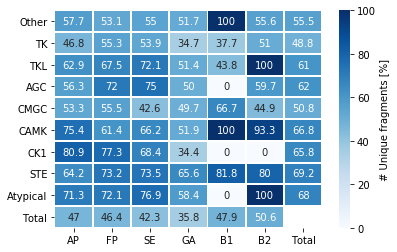

In [59]:
sns.heatmap(n_unique, linewidths=1, annot=True, cbar_kws={"label": "# Unique fragments [%]"}, cmap="Blues", fmt='g')
plt.show()

In [60]:
# average number of unique fragments per kinase group
sum(n_unique_total.drop('Other'))/7

70.34285714285714

In [61]:
sum(n_unique_sp)/6

45.0